<a href="https://colab.research.google.com/github/silviaarellanogarcia/HackEPS2022/blob/main/missi%C3%B3_taronja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍑 MISSIÓ TARONJA 🍑

## Objectius 

Volem que implementeu un model o algoritme que permeti classificar del dataset A2 si aquella imatge hi ha error o no. Ens agradaria que mostressiu alguna gràfica de l'entrenament del model (en cas de fer ML) o mètriques qualitatives ( accuracy, recall, f1...) i quantitatives (matrius de confusió, ROC curve...).

# Setup

Install libraries

In [1]:
import pandas as pd
import numpy as np

Mount drive volume into google colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Extreure les dades

Unziped all images and information to our drive

In [3]:
#!unzip "gdrive/MyDrive/HackEPS2022/data/A2.zip" -d "gdrive/MyDrive/HackEPS2022/data/taronja"

Loading all information into a dataframe

In [4]:
train_df = pd.read_csv("gdrive/MyDrive/HackEPS2022/data/taronja/A2/train-hackeps.csv")
train_df.shape

(700, 10)

##Preprocessing

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Unnamed: 0                            700 non-null    int64 
 1   Unnamed: 0.1                          700 non-null    int64 
 2   name                                  700 non-null    object
 3   path                                  700 non-null    object
 4   Irregularidades puntuales o agujeros  700 non-null    int64 
 5   Marcas verticales o carreras.         700 non-null    int64 
 6   Marcas horizontales o barrados        700 non-null    int64 
 7   Irregularidad del tejido.             700 non-null    int64 
 8   Mancha                                700 non-null    int64 
 9   Franja de color                       700 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 54.8+ KB


In [6]:
train_df.head(15)

,Unnamed: 0,Unnamed: 0.1,name,path,Irregularidades puntuales o agujeros,Marcas verticales o carreras.,Marcas horizontales o barrados,Irregularidad del tejido.,Mancha,Franja de color
0,736,37,c1r1e2n50,badata/cd1/data/c1/r1/images/e2/c1r1e2n50.tif,0,0,0,0,1,0
1,535,36,c2r3e1n16,badata/cd1/data/c2/r3/images/e1/c2r3e1n16.tif,1,0,0,0,0,0
2,607,8,c2r2e3n3,badata/cd1/data/c2/r2/images/e3/c2r2e3n3.tif,0,1,1,0,0,0
3,1,1,c2r3e0n9,badata/cd1/data/c2/r3/images/e0/c2r3e0n9.tif,0,0,0,1,0,0
4,588,39,c1r3e1n36,badata/cd1/data/c1/r3/images/e1/c1r3e1n36.tif,1,0,0,0,0,0
5,674,25,c1r1e3n12,badata/cd1/data/c1/r1/images/e3/c1r1e3n12.tif,1,1,0,0,0,0
6,168,20,c1r1e0n50,badata/cd1/data/c1/r1/images/e0/c1r1e0n50.tif,0,0,0,0,0,0
7,103,4,c1r1e1n36,badata/cd1/data/c1/r1/images/e1/c1r1e1n36.tif,1,0,0,0,0,0
8,173,25,c1r1e0n48,badata/cd1/data/c1/r1/images/e0/c1r1e0n48.tif,0,0,0,0,0,0
9,155,6,c1r1e0n23,badata/cd1/data/c1/r1/images/e0/c1r1e0n23.tif,0,0,0,0,0,0


In [7]:
train_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'path',
       'Irregularidades puntuales o agujeros', 'Marcas verticales o carreras.',
       'Marcas horizontales o barrados', 'Irregularidad del tejido.', 'Mancha',
       'Franja de color'],
      dtype='object')

Getting number of errors of each image with a sum from all errors

In [8]:
train_df["error"] = train_df['Irregularidades puntuales o agujeros'] + train_df['Marcas verticales o carreras.'] + train_df['Marcas horizontales o barrados'] + train_df['Irregularidad del tejido.'] + train_df['Mancha'] + train_df['Franja de color']

Only want the image path and the number of errors

In [9]:
train_df = train_df[["path", "error"]]


In [10]:
train_df.head()

,path,error
0,badata/cd1/data/c1/r1/images/e2/c1r1e2n50.tif,1
1,badata/cd1/data/c2/r3/images/e1/c2r3e1n16.tif,1
2,badata/cd1/data/c2/r2/images/e3/c2r2e3n3.tif,2
3,badata/cd1/data/c2/r3/images/e0/c2r3e0n9.tif,1
4,badata/cd1/data/c1/r3/images/e1/c1r3e1n36.tif,1


Translating number of errors to has some error

In [11]:
train_df["error"] = train_df["error"].map(lambda x: 1 if x > 0 else 0)

In [12]:
train_df.error.value_counts()

1    550
0    150
Name: error, dtype: int64

## Model preprocessing

In [13]:
import cv2, os


As this dataset is not that big, we did this without a generator




In [19]:
img_size = 224
images = []
for index, row in train_df.iterrows(): 
    path = row.path
    path = path.replace("badata/cd1/data/", "gdrive/MyDrive/HackEPS2022/data/taronja/A2/")
    try:
        img_arr = cv2.imread(path)
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        images.append([resized_arr, row.error])
    except Exception as e:
        print(e)

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



Extracting the image (x_train) and the labels (y_train) from the dataset

In [21]:
x_train = []
y_train = []

for feature, label in images:
  x_train.append(feature)
  y_train.append(label)


x_train = np.array(x_train)
y_train = np.array(y_train)



## Modeling

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

In [34]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x200 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('error') and 1 for the other ('no error')
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [35]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Training the model

In [36]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.1, batch_size=64, shuffle=True)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 32s 3s/step - loss: 0.5558 - accuracy: 0.7843 - val_loss: 0.6847 - val_accuracy: 0.7000
Epoch 2/30
10/10 [==============================] - 32s 3s/step - loss: 0.5341 - accuracy: 0.7875 - val_loss: 0.6285 - val_accuracy: 0.7286
Epoch 3/30
10/10 [==============================] - 30s 3s/step - loss: 0.5242 - accuracy: 0.7923 - val_loss: 0.6361 - val_accuracy: 0.7000
Epoch 4/30
10/10 [==============================] - 30s 3s/step - loss: 0.5148 - accuracy: 0.7875 - val_loss: 0.6220 - val_accuracy: 0.7000
Epoch 5/30
10/10 [==============================] - 30s 3s/step - loss: 0.5080 - accuracy: 0.7843 - val_loss: 0.5998 - val_accuracy: 0.7000
Epoch 6/30
10/10 [==============================] - 34s 3s/step - loss: 0.5025 - accuracy: 0.7859 - val_loss: 0.5995 - val_accuracy: 0.7000
Epoch 7/30
10/10 [==============================] - 32s 3s/step - loss: 0.4979 - accuracy: 0.7859 - val_loss: 0.6006 - val_accuracy: 0.7000
Epoch 8/30
10/10 [=============

Guardant el model al drive

In [37]:
model.save_weights('gdrive/MyDrive/HackEPS2022/taronja.pth')

# Generant grafics

In [38]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


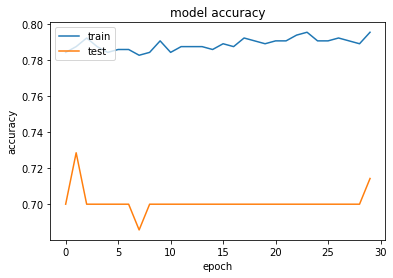

In [39]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


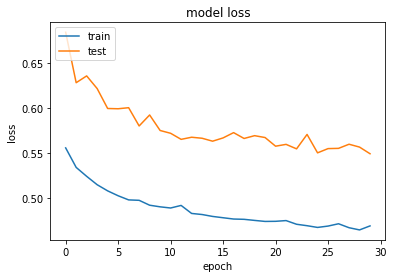

In [40]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

L'accuracy no es un bon indicador en aquest cas ja que les etiquetes estan molt desbalançejades.

In [ ]:
# Confussion matrix
# con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
# con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

# con_mat_df = pd.DataFrame(con_mat_norm,
#                      index = classes, 
#                      columns = classes)

# figure = plt.figure(figsize=(8, 8))
# sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
# plt.tight_layout()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()